 Metodologia
=====================================
## Descripción de los Datos
A continuación una descripción breve de los datos, la pagina de donde fueron extraidos.

## Análisis preliminar descriptivo
Este análisis se hace por medio de lenguaje de programación <b>Python</b>, haciendo uso de el paquete de análisis de texto <b>textblob</b>.
1. Se filtran los datos con etiqueta de "Food".\
Lo anterior con el objetivo de tener todas la imagenes relacionadas con comida
2. Luego se busca hacer el renocimiento de las frecuencias de palabras, ademas de un diciconario para reconocer cual es la cantidad de palabras que tiene los comentarios de cada foto.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
import re
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud
from nltk.probability import FreqDist
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

## Lectura de los datos
La base de datos  tiene la siguiente estructura:\
* **photo:id**:Identificador unico de la foto.
* **business:id**: Identificador unico de el Negocio. 
* **Caption**: Descripción de la foto 
* **label**: Categoria de la foto
* **Stars**: Calificación que se de la la negocio.

Para obetener la imagenes que estan relacionadas a la comida solocamos "*Label= food*" ademas de colocar las fotos que tenian una descripción, puesto que corresponde a nuestro interes.
Finalmente con tal filto encontramos *43462*


In [11]:
data = pd.read_csv('datos_finales.csv', engine='python',sep="|")
regex = re.compile('[^A-Za-z0-9 ^. ^, ^: ^; ^? ^¿ ^¡ ^!]')
def texCC(x,rg): return rg.sub(' ',str(x))
data_F = data.assign(caption = data.caption.map(lambda p: texCC(p, regex)))
data_F.head(4)
#data_F.shape

,photo_id,business_id,caption,label,length,stars
0,002gqWfVal1D2DT6oA-bVQ,qnZzSC4TKen19Gz9nyKCvw,12oz. Boneless Ribeye Grilled to perfection w...,food,92.0,3.0
1,002GtTSYyQ4swIZyEnfF5A,9km51KaQujxsSgdaG9gYSw,"The Most Yummy Tarts: Chantilly, Guava, Salted...",food,70.0,4.0
2,007FeerwcQQRx7ck_xA0QA,nsNONDHbV7Vudqh21uicqw,Surf and turf with 1.5lb lobster and 7oz Filet...,food,100.0,3.5
3,007iKSSCd3hwRwAcE2MIcA,mspZuHQ8rVXpyVMqQIKw_A,Season Special Seafood Wafu Pasta,food,33.0,3.5


## Analisis de el Corpus
El análasis a continuación es de caracter descriptivo donde buscamos:
* Generar un diccionario de parabras para saber con cuanta riqueza lingüistica contamos.
* Mirar frecuencia de palabras, para comprobar la viabilidad del análisis, puesto que si hay un gran cumulo de frecuencia en pocas palabras seía dificl la claseficación de los alimentos.

### Resultados
* El grueso de los comentarios tiene entre 1 y 5 palabras


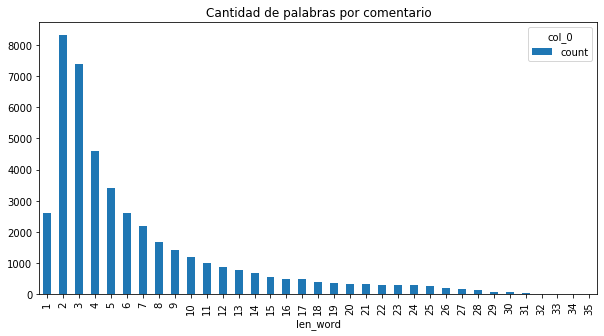

In [4]:
# Cantidad de palabras por comentario
plt.rcParams['figure.figsize'] = [10, 5]
def LENW(x):return len(tknzr.tokenize(str(x)))
data_F = data_F.assign(len_word = data_F.caption.map(LENW))
pd.crosstab(data_F.len_word, columns='count').plot.bar()
plt.title("Cantidad de palabras por comentario")
plt.show()

## Analisis de n-gramas (frecuencias de una palabra)
Omitiendo los tres conectores principales *"and"*, *"the*, y *"with"* las palabras referentes a comida parecen tener una distribución uniforme de frencuencia. Lo anterior era lo esperado para poder una análisis de texto mas adelante.
* El total de palabras es 20217, del total de palabras en el idioma inglés 414.800 , eso es equivalente a 4.8% del total de palabras, lo cual es común puesto que en redes el promedio del uso de palabras esta entre el 3.5 y 5. 

50.0

In [6]:
regex2 = re.compile('[^A-Za-z0-9]')
data_F2 = data.assign(caption = data.caption.map(lambda p: texCC(p, regex2)))
def NGRAM(x,n):
    token=nltk.word_tokenize(str(x))
    bigrams=ngrams(token,n)
    return list(bigrams)
def Table_NGRAM(dat,n):
    n_grams = dat.caption.map(lambda p: NGRAM(p,n))
    n_grams = sum(n_grams,[])
    table_n = pd.DataFrame(FreqDist(n_grams), index =[0]).T
    table_n.columns = ['Count']
    table_n = table_n.sort_values('Count', ascending = False)
    return table_n


table_n1 = Table_NGRAM(data_F2,1)


In [36]:
# cantidad de palabras
print(table_n1.shape)

(20217, 1)


Text(0.5, 1.0, '50 palabras mas frecuentes')

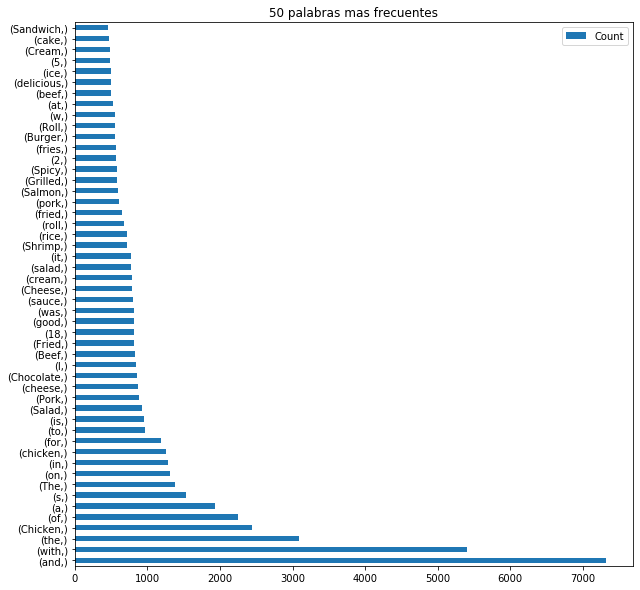

In [7]:
table_n1[:10]
plt.rcParams['figure.figsize'] = [10, 10]
table_n1[:50].plot.barh()
plt.title("50 palabras mas frecuentes")

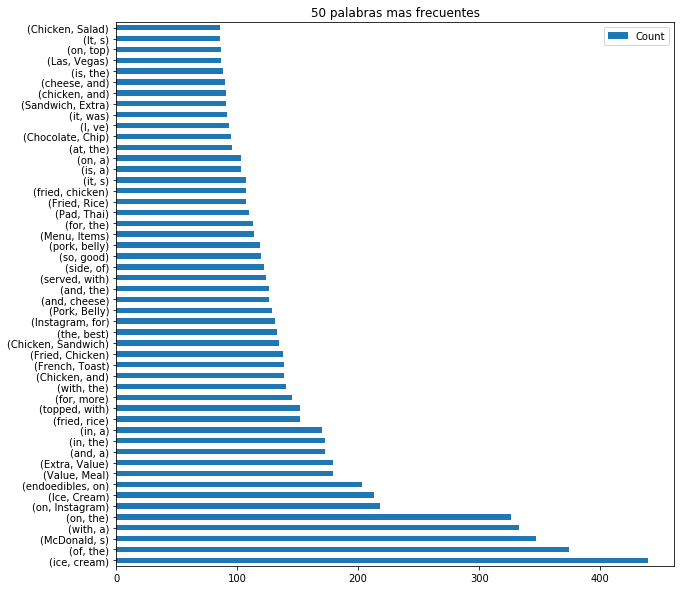

In [9]:
table_n2 = Table_NGRAM(data_F2,2)
table_n2[:10]
table_n2[:50].plot.barh()
plt.title("50 palabras mas frecuentes")
plt.show()

In [ ]:
table_n3 = Table_NGRAM(data_F2,3)
table_n3[:10]
table_n3[:50].plot.barh()
plt.title("50 palabras mas frecuentes")
plt.show()

## Word cloud n-gramas(n = 1) 


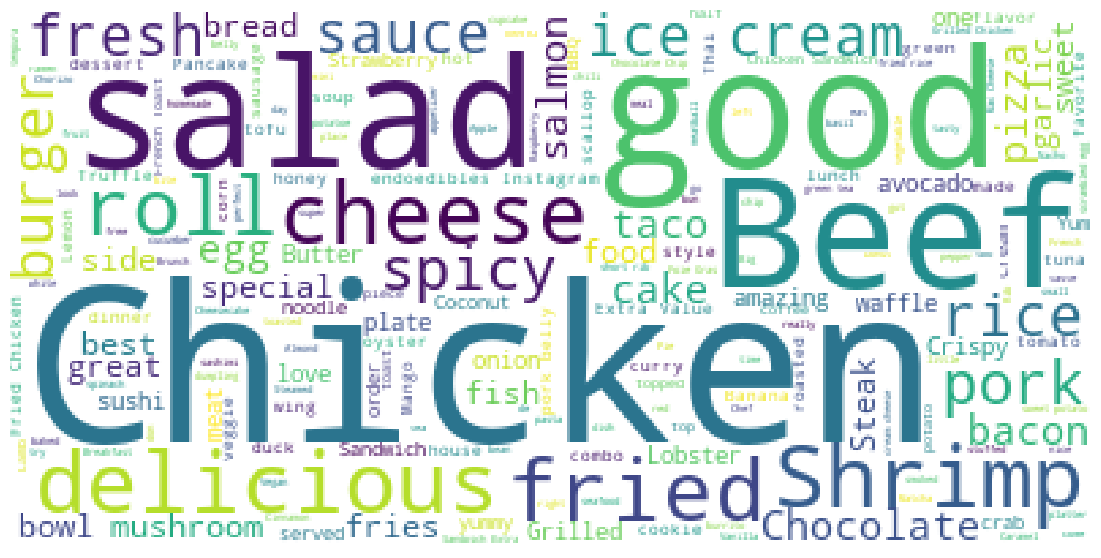

In [18]:
wordcloud = WordCloud(max_words=450,background_color="white").generate(data_F2.caption.sum())
plt.rcParams['figure.figsize'] = [20, 10]
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Conclusiones
Finalmente lo que podemos observar en los siguiente:
* Los caption o descripciones de la fotogracias son fraces cortas, la cantidad de palabras estan concentradas entre las frecuencias 2 y 5.
* Las primeras 50 palabras mas frencuentes, omitiendo los conectores, tiene un rango bastante amplio, entre 900 y 1000 de las mas frecuentes de las primeras 50 y de las ultimas estan entre 25 y 50.
* finalmente en la nube de palabra podemos detectar tanto palabras referente a la comida como se espera, pero también palabras con referencia a sentimientos.